<a id='К_содержанию'></a>

---
## Содержание проекта
---
## Описание проекта

Интернет-магазине «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно провести анализ, проверить теории и  выявить определяющие успешность игры закономерности.

## Описание данных
* **Name** — название игры.
* **Platform** — платформа.
* **Year_of_Release** — год выпуска.
* **Genre** — жанр игры.
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий).
* **EU_sales** — продажи в Европе (миллионы проданных копий).
* **JP_sales** — продажи в Японии (миллионы проданных копий).
* **Other_sales** — продажи в других странах (миллионы проданных копий).
* **Critic_Score** — оценка критиков (максимум 100).
* **User_Score** — оценка пользователей (максимум 10).
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Описание рейтинга ESRB
* **«EC»** («Early childhood») — «Для детей младшего возраста».
* **«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше».
* **«E»** («Everyone») — «Для всех».
* **«T» («Teen»)** — «Подросткам».
* **«M» («Mature»)** — «Для взрослых».
* **«AO» («Adults Only 18+»)** — «Только для взрослых».


##### Разделим данное исследование на несколько частей:

##### Часть 1.  [Изучение общей информации, предобработка](#Изучение_общей_информации,_предобработка)
* 1.1 Загрузка нужных библиотек, изучение таблицы.
* 1.2 Приведение столбцов к нижнему регистру.
* 1.3 Изменение типов данных в столбцах и заполнение пропусков.
* 1.4 Добавление в таблицу столбца с общей стоимостью.

##### Часть 2.  [Исследовательский анализ данных](#Исследовательский_анализ_данных)
* 2.1 Исследование продаж в зависимости от года.
* 2.2 Исследование продаж в зависимости от платформы.
* 2.3 Исследование продаж по годам в зависимости от платформы.
* 2.4 Зависимость объема продаж от платформы.
* 2.5 Продажи игр по годам в зависимости от платформы после 2005 года.
* 2.6 Диаграмма размаха общих продаж.

##### Часть 3.  [Составление портрета пользователя по региону](#Составление_портрета_пользователя_по_региону)
* 3.1 Исследование пользователей в америке.
* 3.2 Исследование пользователей в европе.
* 3.3 Исследование пользователей в японии.

##### Часть 4.  [Проверка гипотез](#Проверка_гипотез)
* 4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* 4.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

##### Часть 5  [Общий вывод](#Общий_вывод)


---
<a id="Изучение_общей_информации,_предобработка"></a>
## Изучение общей информации, предобработка

Загрузим необходимые бибилотеки, а так же посмотрим на данные.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Названия, а так же столбцы `"Name"`, `"Platform"`, `"Platform"` имеют разный регистр. Приведем его к единому регистру.

In [2]:
df.columns = df.columns.str.lower()

In [3]:
for letter in df[['name', 'platform', 'genre']]:
    df[letter] = df[letter].str.lower()

In [4]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь посмотрим на типы данных в столбцах и приведем их к необходимым типам данных.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df = df.copy()

Проверим пропущенные значения в `'year_of_release'`.

In [7]:
df['year_of_release'].isna().sum()

269

Возможно пустые значения возникли ввиду технической ошибки.Удалим их и приведем столбец к нужному типу.

In [8]:
df = df.dropna(subset=['year_of_release'])

In [9]:
df['year_of_release'] = df['year_of_release'].astype(int)

Так же в столбце `"user_score"` втречается такое заначение как **'tbd'**, или **"to be determined"** («будет определено»). Посмотрим на его значения.

In [10]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


По скольку эти значения не определены их необходимо будет заполнить. Посмотрим на значения в столбце `'critic_score'` и сравним их с `'user_score'`.

In [11]:
df.query('critic_score > 1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16696,breach,pc,2011,shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.00,0.00,48.0,tbd,E
16702,storm: frontline nation,pc,2011,strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+


Так же посмотрим на корреляцию между этими столбцами.

In [12]:
df[['critic_score', 'user_score']].corr()

,critic_score
critic_score,1.0


Оценки критиков очень близки к оценкам пользователей. Заполним эти значения учитывая бальную шкалу.

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = df.loc[df['user_score'] == 'tbd', 'critic_score']/10

Теперь можно привести `'user_score'` к типу **'float'**.

In [14]:
df['user_score'] = df['user_score'].astype(float)

По аналогии заполним пустые значения рейтинга в `"critic_score"` и `"user_score"` где это возможно, учитывая бальную систему.

In [15]:
df.loc[(df['user_score'].isna()) & (df['critic_score']>1), 'user_score'] = (
    df.loc[(df['user_score'].isna()) & (df['critic_score']>1), 'critic_score']/10) #Заполняем пропущеные значения в'user_score'

df.loc[(df['critic_score'].isna()) & (df['user_score']>1), 'critic_score'] = (
    df.loc[(df['critic_score'].isna()) & (df['user_score']>1), 'user_score']*10) #Заполняем пропущеные значения в'critic_score'

Посмотрим на оставшиеся пропущенные значения.

In [16]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7902
user_score         7894
rating             6678
dtype: int64

Посмотрим на пропущенные значения в столбце `"name"`.

In [17]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти значения датируются 1993 годом. Скорее всего это уже устаревшие данные и они не будут использоваться для подсчета.

Так же в столбце `'critic_score'` осталось множество пропущенных значений их не стоит заполнять, так как это повлияет на общий результат.

В столбце `'rating'` присутствуют пропущенные значения, заполним их как **"NR"** (Not rated) Для удобства учета.

In [18]:
df['rating'] = df['rating'].fillna('NR')

Добавим в таблицу общую прибыль с продаж в таблицу

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


## Вывод
В таблице были обнаружены пропущенные значения, не подходящие типы данных и значения **"tbd"**. Типы данных были приведены к нужным, заполнена часть пропусков, а так же заменены значения **"tbd"** ,добавлен столбец `'total_sales'`. Так же были взаимно заменены пропущенные значения в столбцах `'critic_score'` и `'critic_score'`. В столбце `'rating'` пропущенные значения были заменены на **"NR "**

[К содержанию](#К_содержанию)

---
<a id="Исследовательский_анализ_данных"></a>
## Исследовательский анализ данных

Посмотрим на объем игр выпущенные в разные года.

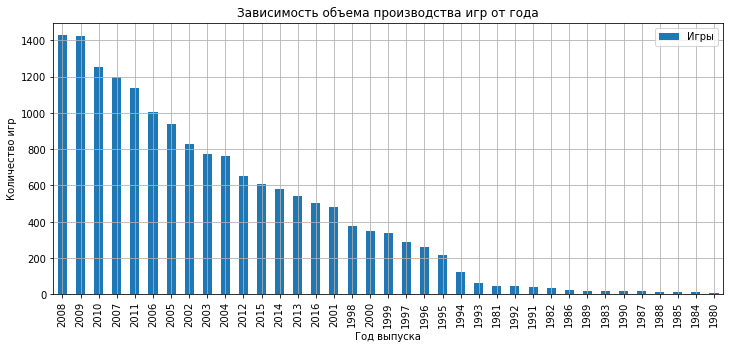

In [21]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name',ascending=False).plot(
    kind='bar', figsize=(12,5), grid=True)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Количество игр', fontsize=10)
plt.title('Зависимость объема производства игр от года')
plt.legend(['Игры'])
plt.show()

На гистограме видно, что после 1995 года количество производимых игр резко падает. Осавим промежуток до 95 года включительно.

In [22]:
df = df.loc[df['year_of_release']>=1995]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


Теперь посмотрим на топ 10 платформ по продажам и выделим самые прибыльные из них.

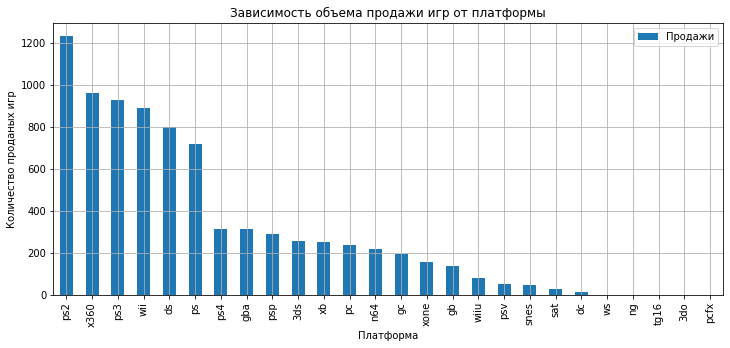

In [23]:
df.pivot_table(index='platform' ,values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).plot(
    kind='bar', figsize=(12,5), grid=True)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Количество проданых игр', fontsize=10)
plt.title('Зависимость объема продажи игр от платформы')
plt.legend(['Продажи'])
plt.show()

После платформы **"ps"** идет резкий спад по продажам нам нужны первые 6 платформ.

In [24]:
platforms = ['ps', 'ps2', 'ds', 'x360', 'ps3', 'wii']
high_sales = df.query('platform == @platforms')
high_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,ds,2009,sports,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16704,plushees,ds,2008,simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,NaN,NaN,NR,0.00
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01


Постоим гистограммы платформ с большими продажами.

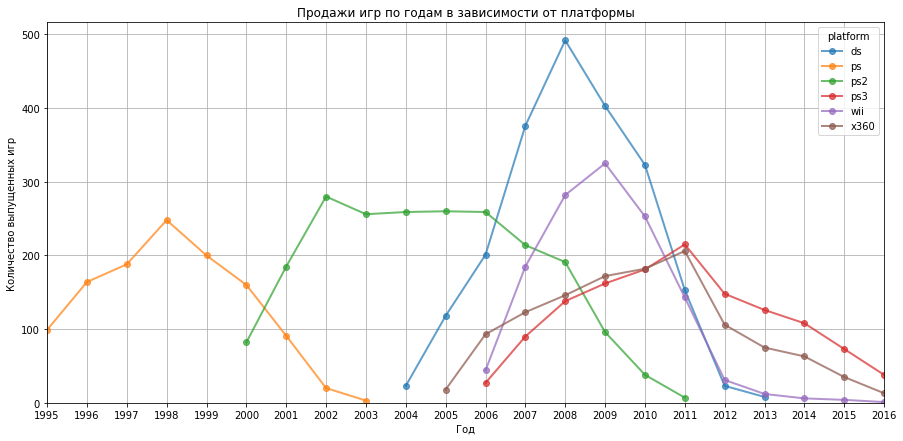

In [25]:
sales = high_sales.pivot_table(index='year_of_release',columns='platform', values='name', aggfunc='count')
sales.plot(style='-o', figsize=(15,7), grid=True, lw=2, alpha=0.7)
plt.xticks([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
plt.xlabel("Год", fontsize=10)
plt.ylabel("Количество выпущенных игр", fontsize=10)
plt.title('Продажи игр по годам в зависимости от платформы')
plt.ylim(0)
plt.show()

На графике видно, что у платформы **"wii"** и **"ds"** становятся не популярными достаточно быстро. Платформы **"ps"**, **"ps2"**, **"ps3"** и **"x360"** держатся около 10 лет, возможно из за того, что для этих компаний рынок игр гораздо шире, а так же ресурсы платформы выше чем у конкурентов. Тем не менее платформа **"ps2"** самая прибыльная.

In [26]:
a=0
for num in platforms:
    a += high_sales.loc[(df['platform'] == num)].pivot_table(index='year_of_release', 
                                                               values='platform', aggfunc='count').count()
a = (a[0] / len(platforms)).round() 
print('Среднее время существования платформы: {:.0f}'.format(a),'лет')


Среднее время существования платформы: 11 лет


In [27]:
print('Среднее время существования платформы: {:.0f} лет'.format(a))
print(f'Среднее время существования платформы: {a:.0f} лет')

Среднее время существования платформы: 11 лет
Среднее время существования платформы: 11 лет


---

Осечем платформы до 2006 года, что бы оставить только актуальный период.

In [28]:
actual_df = df.loc[df['year_of_release']>=2013]
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NR,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01


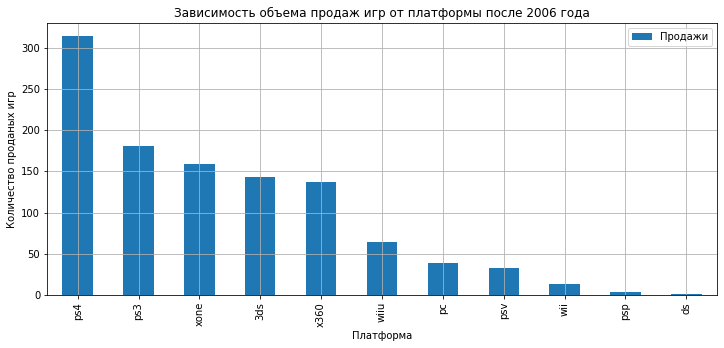

In [29]:
actual_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(
    kind='bar', figsize=(12,5), grid=True)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Количество проданых игр', fontsize=10)
plt.title('Зависимость объема продаж игр от платформы после 2006 года')
plt.legend(['Продажи'])

Явные лидеры по объему продаж: **"x360"**, **"ps3"**, **"wii"**, **"ds"**. Теперь посмотрим на график продаж по годам в зависимости от платформы.

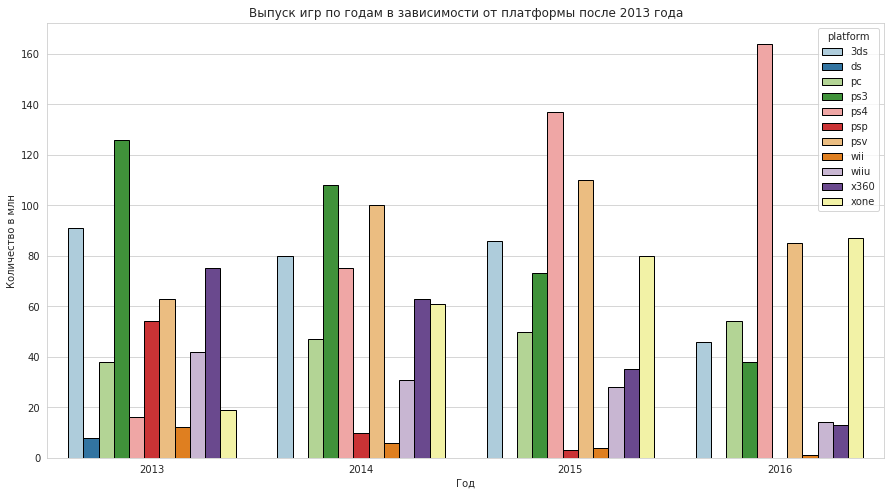

In [30]:
sales_future = actual_df.pivot_table(index=['year_of_release','platform'], values='name', aggfunc='count').reset_index()

plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.barplot(data=sales_future, x='year_of_release', y='name',hue='platform', palette="Paired", edgecolor='black')
plt.xlabel("Год", fontsize=10)
plt.ylabel("Количество в млн", fontsize=10)
plt.title('Выпуск игр по годам в зависимости от платформы после 2013 года')
plt.show()

На графике можно увидеть, что в лидерах по продажам платформы: **"ds"**, **"wii"**, **"ps2"**, на спад идут платформы **"ps3"**, **"x360"**, **"wiiu"**. Растут **"ps4"**, **"xone"**, **"pc"**.

Посмотрим на занчения столбца `'total_sales'`, что бы построить **Диаграмму размаха**.

In [31]:
actual_df['total_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

Среднее значение этого столбца не превышает 0.5, а максимальное значение больше 82. Посмотрим на значения с отсечкой выбросов.

Text(0.5, 1.0, 'Продажи игр по платформам')

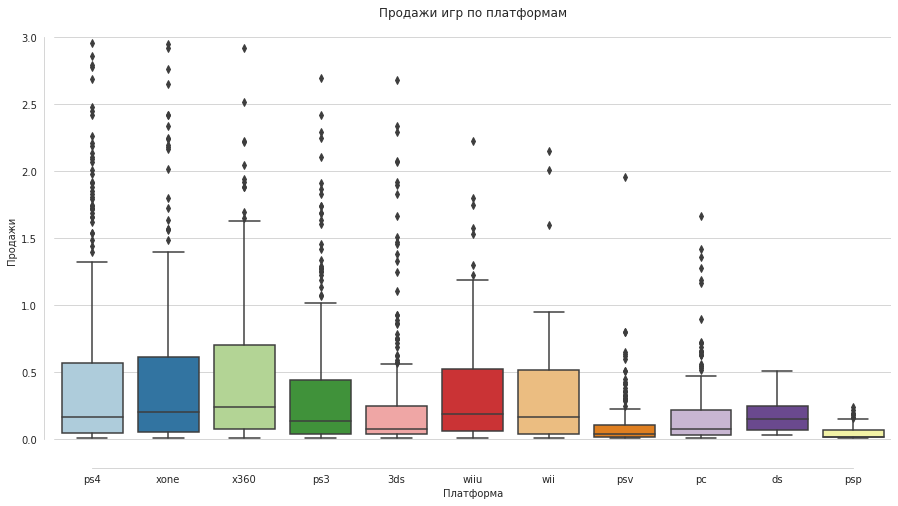

In [32]:
box = actual_df.loc[actual_df['total_sales']<3]

plt.figure(figsize=(15,8))
sns.boxplot(data=box, x='platform', y='total_sales', palette="Paired")
sns.despine(offset=10, trim=True)
plt.xlabel("Платформа", fontsize=10)
plt.ylabel("Продажи", fontsize=10)
plt.title('Продажи игр по платформам')

На графике видно, что большинство платформ по продажам игр в основном не выходят за пол миллиона копий. Медианное значение превышает 250тыс только у **"ps3"** и **"x360"**. Так же видно, много выбросов у всех платформ. Эти выбросы это удачные проекты продажи которых иногда сильно превышают основную массу.

#### Выберем платформу платформу **"ps4"** для изучения корреляции отзывов с продажами.

In [33]:
ps_sales = actual_df.loc[actual_df['platform']=='ps4']

In [34]:
ps_sales.loc[:,('critic_score', 'user_score', 'total_sales')].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.574627,0.400903
user_score,0.574627,1.000000,-0.032459
total_sales,0.400903,-0.032459,1.000000


Корреляция показывает, что продажи зависят больше от оценок критиков, чем от оценок пользователей. Построим графики.

In [35]:
def score(data, who, x_lab, title):    
    sns.lmplot(data=data,x=who, y="total_sales")
    plt.xlabel(x_lab, fontsize=10)
    plt.ylabel("Продажи", fontsize=10)
    plt.title(title)

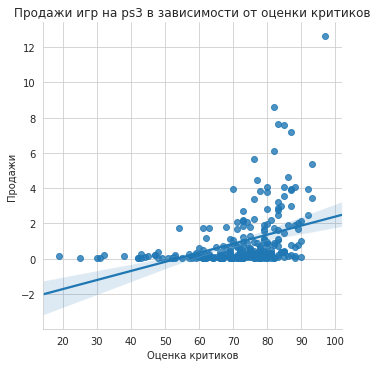

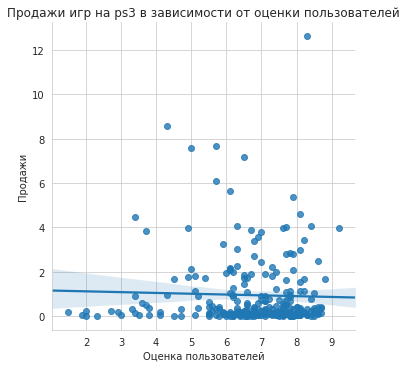

In [36]:
score(ps_sales, 'critic_score', "Оценка критиков", 'Продажи игр на ps3 в зависимости от оценки критиков')
score(ps_sales, 'user_score', "Оценка пользователей", 'Продажи игр на ps3 в зависимости от оценки пользователей')

Как видно из графиков оценки, оценки критиков сильно отличаются от пользовательскиз. Чем выше оценки критиков, тем больше продажи, у пользователей оценки сильно разбросаны, но даже при низких оценках есть высокие продажи. Возможно из за того, что критики более публичны и тоньше разбираются в играх, чем рядовой пользователь.

Посмотрим на корреляцию и графики общих продаж в зависимости от оценок.

In [37]:
actual_df.loc[:,('critic_score', 'user_score', 'total_sales')].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.656231,0.247928
user_score,0.656231,1.000000,-0.000917
total_sales,0.247928,-0.000917,1.000000


В общих продажах от пользовательских оценок не зависят продажи. Теперь посмотрим на графики.

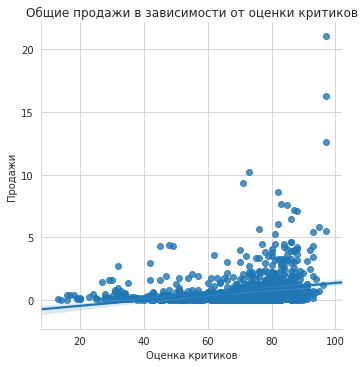

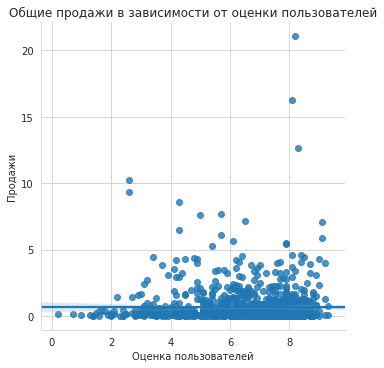

In [38]:
score(actual_df, 'critic_score', "Оценка критиков", 'Общие продажи в зависимости от оценки критиков')
score(actual_df, 'user_score', "Оценка пользователей", 'Общие продажи в зависимости от оценки пользователей')

Общие графики схожи с графиками продаж по **"ps3"**. Можно сделать вывод, что оценки критиков влияют на продажи сильнее, чем оценки пользователей.

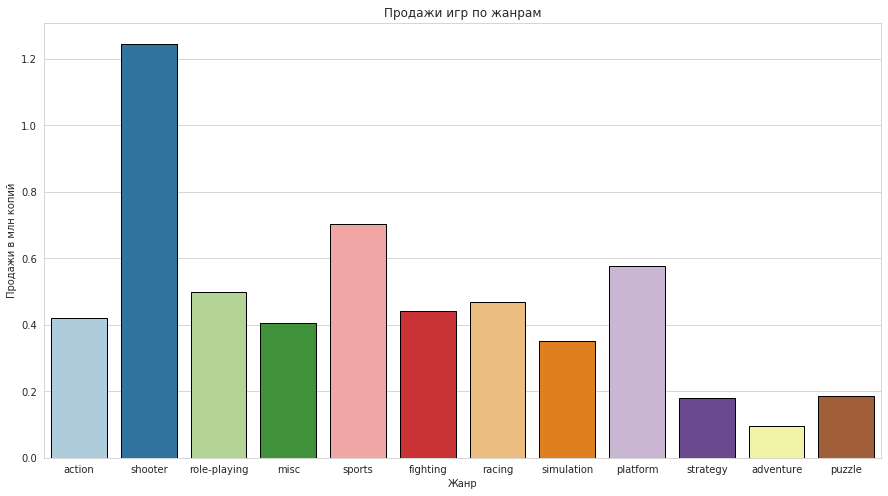

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(data=actual_df, x='genre', y="total_sales", palette="Paired",linewidth=1, edgecolor='black', ci=None)
plt.xlabel("Жанр", fontsize=10)
plt.ylabel("Продажи в млн копий", fontsize=10)
plt.title('Продажи игр по жанрам')
plt.show()

Как видно на графике безусловным лидером является жанр **"shooter"**, самый слабо продаваемый жанр **"adventure"**. Скорее всего людям нравятся более динамичные игры, чем ниже динамика жанра, тем меньше спрос.

## Вывод
Среднее время существования платформы-11 лет. Лидеры по объему продаж: **"x360"**, **"ps3"**, **"wii"**, **"ds"**. Диаграмма размаха показала, что основная часть игр не выходит за отметку продаж в **250тыс копий**, но в то же время есть много популярных проектов, которые выходят далеко за эти рамки и даже встречаются игры продажи которых перевалили за **80млн**. Оценки критиков больше влияют на продажи игр, чем оценки пользователей. Самые популярные жанры -**"shooter"** и **"platform"**, самые не популярные **"adventure"**, **"strategy"**

[К содержанию](#К_содержанию)

--- 

<a id="Составление_портрета_пользователя_по_региону"></a>
## Составление портрета пользователя по региону.

Рассмотрим по отдельности каждый регион по платформам, жанру игр и влиянию рейтинга на продажу игр.

In [40]:
def regions(x,y,x_lab,title):   
    plt.figure(figsize=(15,8))
    sns.barplot(data=actual_df, x=x, y=y, palette="Paired",linewidth=1, edgecolor='black', ci=None)
    plt.xlabel(x_lab, fontsize=10)
    plt.ylabel("Продажи", fontsize=10)
    plt.title(title)
    plt.show()

### Америка

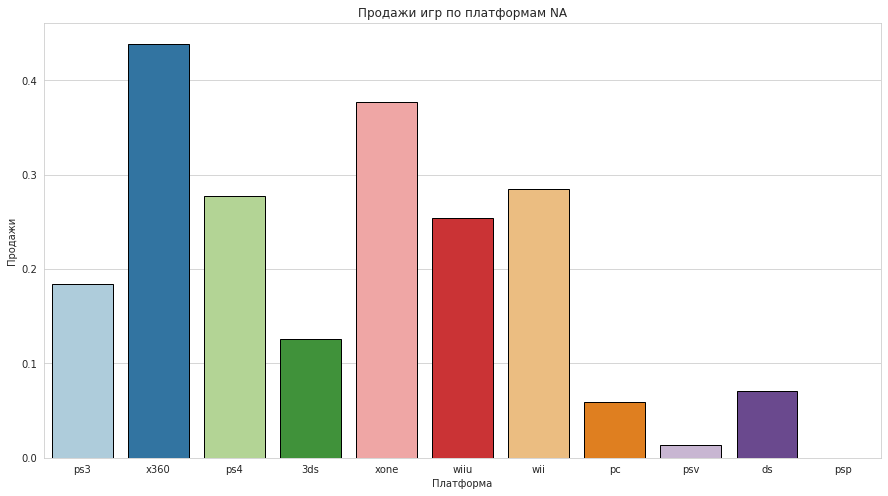

In [41]:
regions('platform', "na_sales", 'Платформа','Продажи игр по платформам NA')

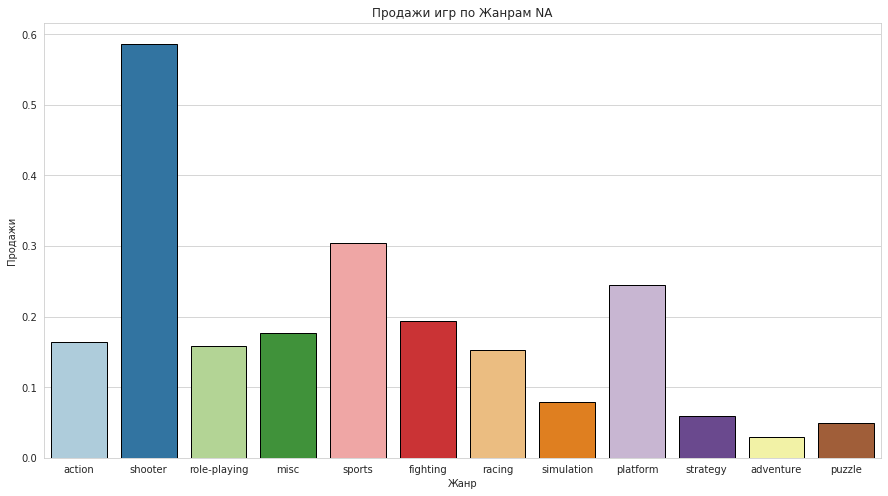

In [42]:
regions('genre', "na_sales", 'Жанр','Продажи игр по Жанрам NA')

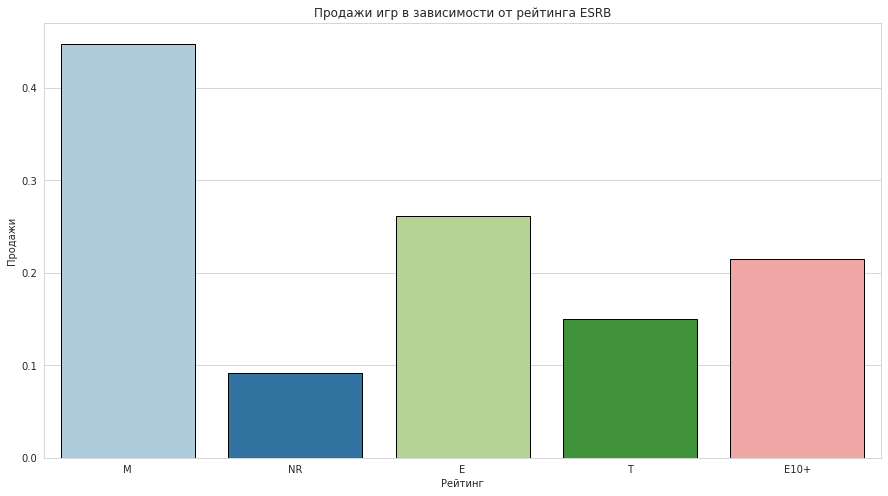

In [43]:
regions('rating', "na_sales", 'Рейтинг','Продажи игр в зависимости от рейтинга ESRB')

В америке самые популярные платыформы **"x360"**, **"wii"**, **"xone"**, **"ps4"**, **"wiiu"**, самые популярные жанры **"shooter"**, **"sports"**, **"platform"**, **"fighting"**, **"misc"** продажи с рейтиногом **"M"** самые крупные. Дальше идут **"E"**, **"E10+"** ,**"T"**, **"NR"**.
### Европа

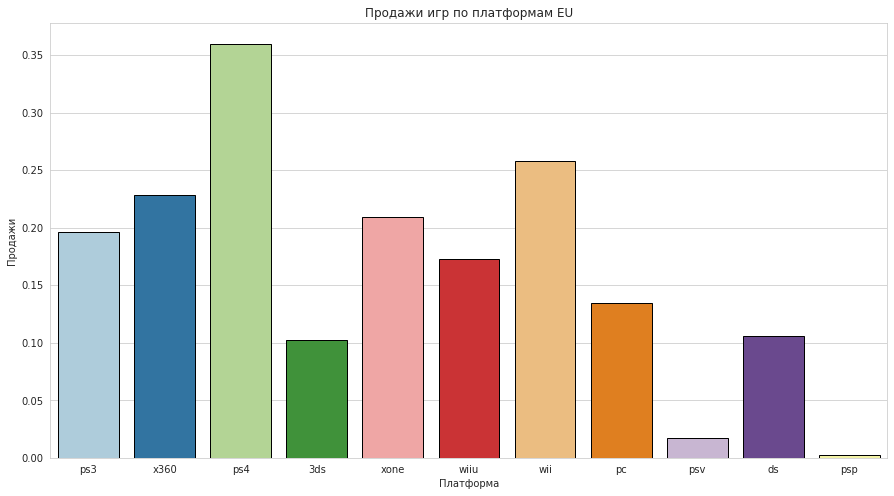

In [44]:
regions('platform', "eu_sales", 'Платформа','Продажи игр по платформам EU')

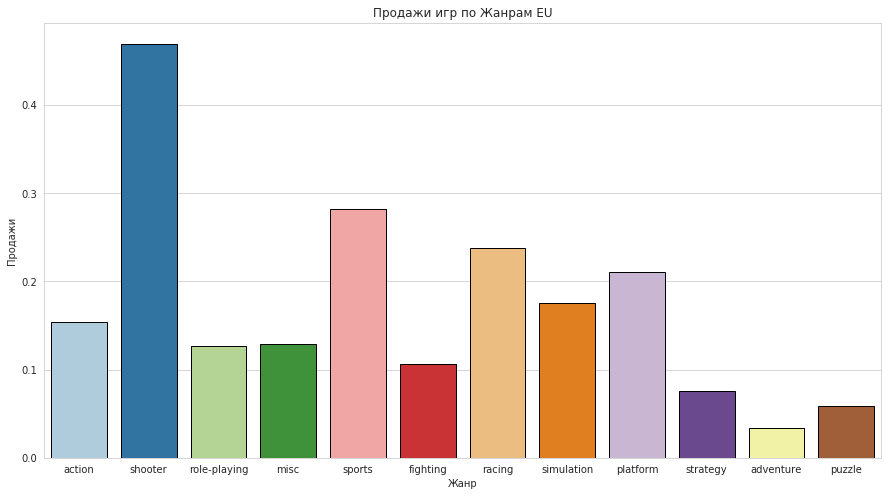

In [45]:
regions('genre', "eu_sales", 'Жанр','Продажи игр по Жанрам EU')

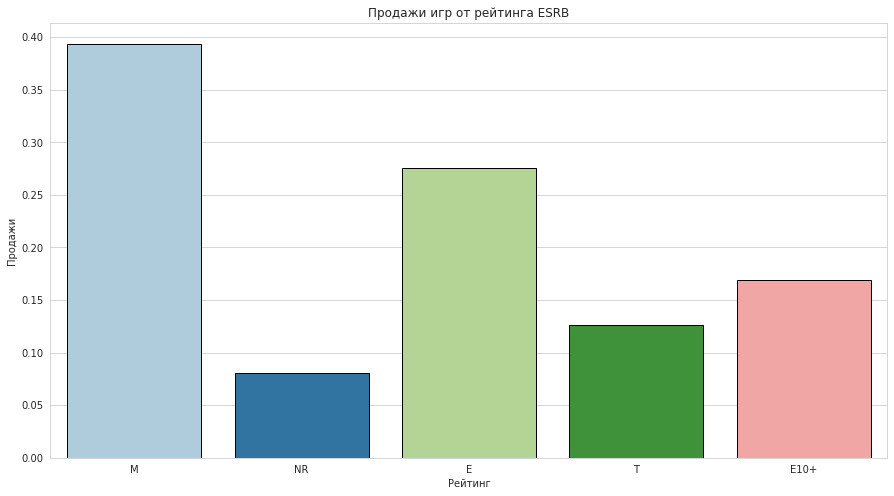

In [46]:
regions('rating', "eu_sales", 'Рейтинг','Продажи игр от рейтинга ESRB')

В европе самая популярная полатформа **"ps4"**. Менее популярны **"wii"**, **"x360"**, **"xone"**, **"ps3"** Так же как и в америке самые популярные жанры **"shooter"**, **"sports"**,но так же популярны , **"racing"**, **"platform"**, **"simulation"**. Самые популярный рейтинг **"M"**. За ним идут **"E"**, **"E10+"**, **"T"**, **"NR"**.
### Япония

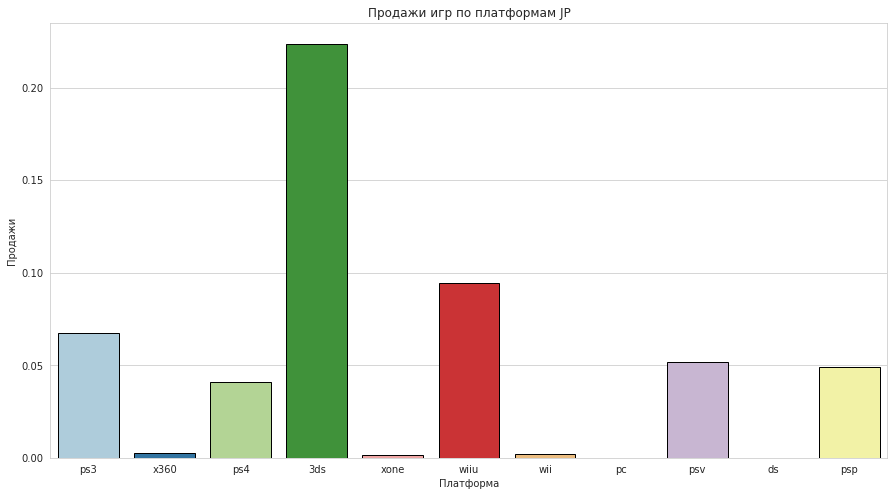

In [47]:
regions('platform', "jp_sales", 'Платформа','Продажи игр по платформам JP')

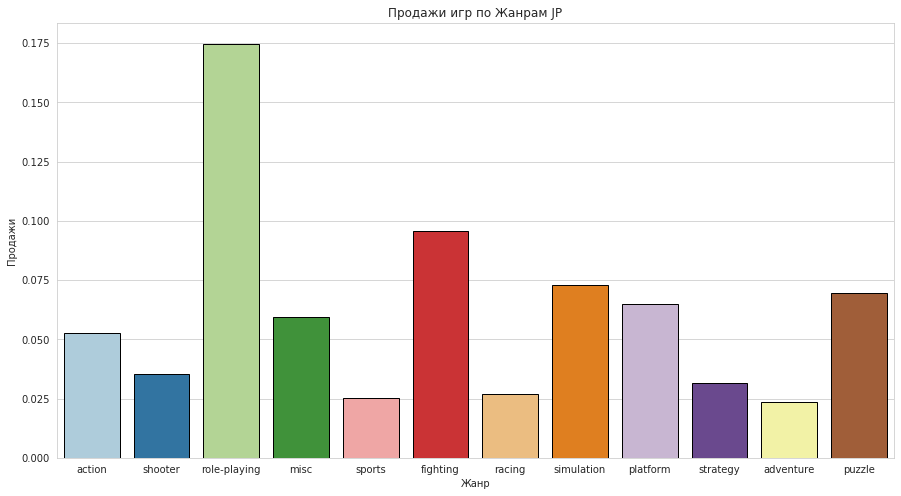

In [48]:
regions('genre', "jp_sales", 'Жанр','Продажи игр по Жанрам JP')

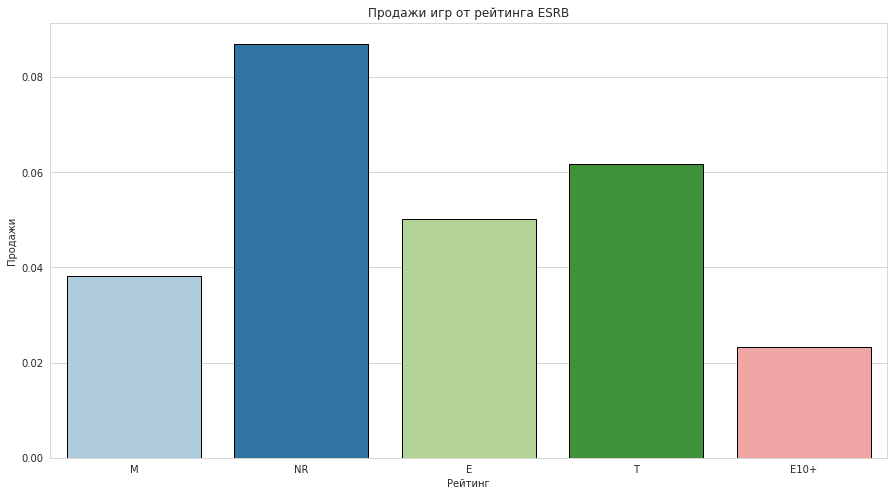

In [49]:
regions('rating', "jp_sales", 'Рейтинг','Продажи игр от рейтинга ESRB')

В японии самой популярной платформой является **"3ds"**. Продажи игр для этой платформы в несколько раз превышают продажи на других платформах. Так же в топ 5 входят **"wiiu"**, **"ps3"**, **"psv"**, **"psp"**  Самые популярные жанры **"role-play"**, **"fighting"**, **"simulation"**, **"puzzle"**, **"platform"**. В японии по рейтингу **ESBR** на первом месте игры без рейтинга. Дальше идут **"T"**, **"E"**, **"M"**, **"E10+"**.

## Вывод

В америке и европе продажи по жанрам и рейтингу похожи, но отличается выбор платформы. Европа выбирает **"ps4"** а америка **"xbox"**. Япония сильно отличается от европы и америки. Nintendo 3ds имеет огромную популярность в Японии, как и жанр **"role-play"**, а так же продаются множество игр без рейтинга **ESRB**. Скорее всего эти платформы популярны, так как в японии маленькое жилье и нет места расположить приставку или компьютер. Можно сделать вывод, из большого объема игр без рейтинга, что японский рынок массово выпускает игры для платформы **Nintendo** для получения прибыли.

[К содержанию](#К_содержанию)

---

<a id="Проверка_гипотез"></a>
## Проверка гипотез

* **Первая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* **Вторая гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Сформулируем нулевую и альтернативную гипотезы


* **Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* **Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC разные.


In [50]:
rating_xone = actual_df.loc[actual_df['platform']=='xone']['user_score'].dropna()
rating_pc = actual_df.loc[actual_df['platform']=='pc']['user_score'].dropna()

Посмотрим на дисперсии рейтинга пользователей обеих платформ.

In [51]:
print(np.var(rating_xone, ddof=1))
print(np.var(rating_pc, ddof=1))

1.8890217959895377
3.0181091811414387


In [52]:
alpha =.05

hyp1_result = st.ttest_ind(rating_xone, rating_pc, equal_var=False)

print(hyp1_result.pvalue)

if (hyp1_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

0.16369538277760132
Не получилось отвергнуть нулевую гипотезу


#### После проверки было выявлено, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Сформулируем нулевую и альтернативную гипотезы

* **Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
* **Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [53]:
rating_action = actual_df.loc[actual_df['genre']=='action']['user_score'].dropna()
rating_sports = actual_df.loc[actual_df['genre']=='sports']['user_score'].dropna()

In [54]:
print(np.var(rating_action, ddof=1))
print(np.var(rating_sports, ddof=1))

1.7753931038064081
3.1571505252664673


In [55]:
alpha =.05

hyp2_result = st.ttest_ind(rating_action, rating_sports, equal_var=False)

print(hyp2_result.pvalue)

if (hyp2_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")   

5.894469247577666e-21
Отвергаем нулевую гипотезу


#### После проверки было выявлено, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

[К содержанию](#К_содержанию)
<a id="Общий_вывод"></a>

---

## Общий вывод

Была проведена предобработка данных, заполнены пропущенные значения, столбцы приведены к нужным типам. Пропуски в столбце `"raiting"` были заполнены значениями **"NR"**.

При проведении анализа было выявлено, что среднее время существования платформы-11 лет. Лидеры по объему продаж: **"x360"**, **"ps3"**, **"wii"**, **"ds"**. В основном продажи игр не выходят за 250тыс копий, но есть много выбросов, продажи которых собрали более миллиона копий. Оценки критиков больше влияют на продажи игр, чем оценки пользователей. Самые популярные жанры -**"shooter"** и **"platform"**, самые не популярные **"adventure"**, **"strategy"**.

В америке и европе продажи по жанрам и рейтингу похожи. Европа выбирает **"ps4"** а америка **"xbox"**. Япония сильно отличается от остальных стран. В японии популярна **Nintendo 3ds**  и жанр **"role-play"**, а так же продаются множество игр без рейтинга **ESRB**.

Проверки гипотез показали, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.

Для того, что бы игра была успешной, она должна быть оценена критиками высоко. Для америки и европы это должен быть жанр **"shooter"** или **"platform"**, но для разных регионов должна быть своя платформа. Для японии это должны быть игры в жанре **"role-play"** на **Nintendo 3ds**.

[К содержанию](#К_содержанию)